In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from importlib.resources import path
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

In [2]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

Here I am normalizing the data instead of being form 0 to 255 I am making it between 0 and 1

(28, 28, 1)


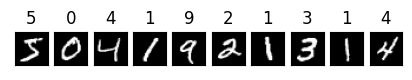

In [3]:
X_train, x_test = X_train/255.0, x_test/255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

fig = plt.figure(figsize=(5, 3))
for i in range(10):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]), cmap='gray')
    ax.set_title(Y_train[i])
input_shape = X_train.shape[1:]
print(input_shape)

Here we I will create the neural network that I will train to classify the digits.

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               2769408   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
____________________________________________

Now after creating the neural network, I will train it on the MNIST dataset

In [8]:
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print(logs)
    if(logs.get('accuracy') > 0.996):
      print("\nIt's accurate enough so let's stop!\n")
      self.model.stop_training = True
                            
callbacks = myCallback()


model.fit(
    X_train, 
    Y_train,
    epochs=10,
    callbacks=[callbacks]
)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9967{'loss': 0.009446104988455772, 'accuracy': 0.996749997138977}

It's accurate enough so let's stop!

1875/1875 [==============================] - 37s 20ms/step - loss: 0.0094 - accuracy: 0.9967


Saving the model to not do the whole trainning again.

In [9]:
model.save("digit_classification.h5")

Here we will store the predicitons from the test dataset. 

In [11]:
predictions = model.predict([x_test])

313/313 [==============================] - 1s 4ms/step


Here we are trying to display the results of some predictions.

6


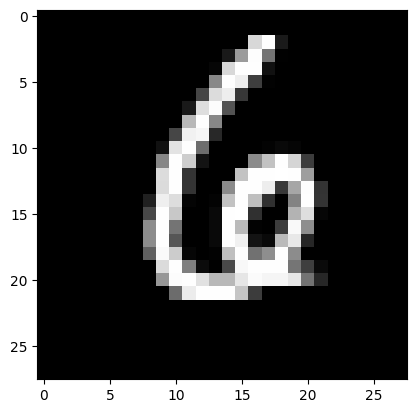

In [12]:
print(np.argmax(predictions[123]))
plt.imshow(x_test[123], cmap='gray')
plt.show()

Finally, here is the accuracy of the model:

In [13]:
(model_loss, model_accuracy) = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0421 - accuracy: 0.9868


In [14]:
print(f'the accuracy of my model is: {model_accuracy * 100}%')

the accuracy of my model is: 98.68000149726868%


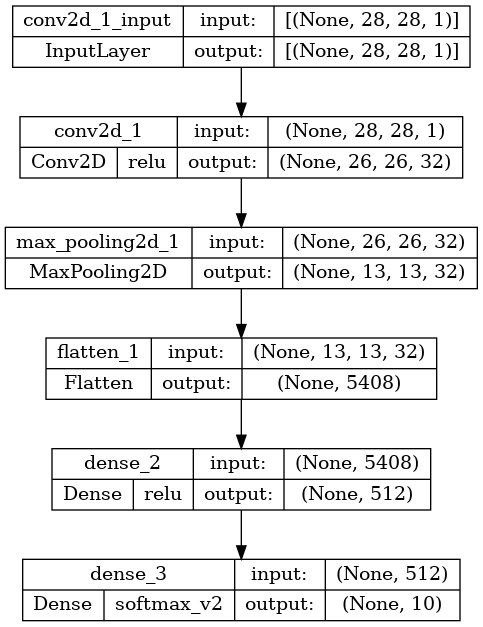

In [15]:
plot_model(
    model, 
    to_file='NN_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TL",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)